In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df_IDH = pd.read_csv('https://raw.githubusercontent.com/JoaoP-Silva/Covid-analysis/main/HDI.csv')
df_VACCINATION = pd.read_csv('https://raw.githubusercontent.com/JoaoP-Silva/Covid-analysis/main/country_vaccinations.csv')

In [ ]:
df_IDH.head()

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,Albania,0.65,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.59,0.595,0.602,0.611,...,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,..,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


In [ ]:
df_VACCINATION.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86511,Zimbabwe,ZWE,2022-03-29,9039729.0,5053114.0,3510256.0,105369.0,103751.0,59.90,33.48,23.26,6874.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [ ]:
filter = df_VACCINATION.groupby(['country'])['date'].max().reset_index()
keys = list(filter.columns.values)
i1 = df_VACCINATION.set_index(keys).index
i2 = filter.set_index(keys).index
df_VACCINATION = df_VACCINATION[i1.isin(i2)]
df_VACCINATION

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
393,Afghanistan,AFG,2022-03-22,5751015.0,5082824.0,4420127.0,NaN,6319.0,14.44,12.76,11.10,159.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
832,Albania,ALB,2022-03-24,2754244.0,1278902.0,1215199.0,NaN,1821.0,95.87,44.52,42.30,634.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1237,Algeria,DZA,2022-03-09,13704895.0,7461932.0,6110712.0,NaN,4307.0,30.72,16.72,13.70,97.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
1650,Andorra,AND,2022-03-13,151997.0,57817.0,53367.0,NaN,34.0,196.50,74.74,68.99,440.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2040,Angola,AGO,2022-03-25,17535411.0,11235059.0,5993792.0,NaN,34171.0,51.68,33.11,17.66,1007.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85073,Wales,OWID_WLS,2022-03-28,6927437.0,2528664.0,2399341.0,2254.0,1609.0,218.53,79.77,75.69,508.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
85444,Wallis and Futuna,WLF,2022-03-28,13073.0,NaN,NaN,NaN,19.0,117.84,NaN,NaN,1713.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
85756,Yemen,YEM,2022-03-16,807502.0,643501.0,404781.0,NaN,2271.0,2.65,2.11,1.33,74.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",World Health Organization,https://covid19.who.int/
86106,Zambia,ZMB,2022-03-29,3402612.0,NaN,2182849.0,12073.0,13650.0,17.98,NaN,11.54,721.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm...",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...


In [ ]:
df_IDH = df_IDH[['HDI Rank', 'Country', '2019' ]]
df_IDH

,HDI Rank,Country,2019
0,169,Afghanistan,0.511
1,69,Albania,0.795
2,91,Algeria,0.748
3,36,Andorra,0.868
4,148,Angola,0.581
...,...,...,...
184,113,Venezuela (Bolivarian Republic of),0.711
185,117,Viet Nam,0.704
186,179,Yemen,0.470
187,146,Zambia,0.584


In [ ]:
temp = df_VACCINATION.merge(df_IDH, 
             how = "inner",
             left_on = "country", right_on = "Country")
temp

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,HDI Rank,Country,2019
0,Afghanistan,AFG,2022-03-22,5751015.0,5082824.0,4420127.0,NaN,6319.0,14.44,12.76,11.10,159.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,169,Afghanistan,0.511
1,Albania,ALB,2022-03-24,2754244.0,1278902.0,1215199.0,NaN,1821.0,95.87,44.52,42.30,634.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,69,Albania,0.795
2,Algeria,DZA,2022-03-09,13704895.0,7461932.0,6110712.0,NaN,4307.0,30.72,16.72,13.70,97.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/,91,Algeria,0.748
3,Andorra,AND,2022-03-13,151997.0,57817.0,53367.0,NaN,34.0,196.50,74.74,68.99,440.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,36,Andorra,0.868
4,Angola,AGO,2022-03-25,17535411.0,11235059.0,5993792.0,NaN,34171.0,51.68,33.11,17.66,1007.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/,148,Angola,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Uzbekistan,UZB,2022-03-13,44177104.0,18633103.0,13852504.0,NaN,87506.0,130.18,54.91,40.82,2579.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",World Health Organization,https://covid19.who.int/,106,Uzbekistan,0.720
163,Vanuatu,VUT,2022-02-28,199464.0,114284.0,85180.0,NaN,1475.0,63.43,36.34,27.09,4691.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...,140,Vanuatu,0.609
164,Yemen,YEM,2022-03-16,807502.0,643501.0,404781.0,NaN,2271.0,2.65,2.11,1.33,74.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",World Health Organization,https://covid19.who.int/,179,Yemen,0.470
165,Zambia,ZMB,2022-03-29,3402612.0,NaN,2182849.0,12073.0,13650.0,17.98,NaN,11.54,721.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm...",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...,146,Zambia,0.584


In [ ]:
temp = temp.dropna()

In [83]:
filtro = temp['2019'] >= 0.7
t_obs = temp[filtro]['people_fully_vaccinated_per_hundred'].mean() - temp[~filtro]['people_fully_vaccinated_per_hundred'].mean()
N = 20000
diferencas = np.zeros(N)
cont = 0
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = temp[filtro]['people_fully_vaccinated_per_hundred'].mean() - temp[~filtro]['people_fully_vaccinated_per_hundred'].mean()
    diferencas[i] = diff
    if diff >= t_obs:
      cont = cont + 1
cont/N

0.0

In [77]:
len(diferencas)

10000

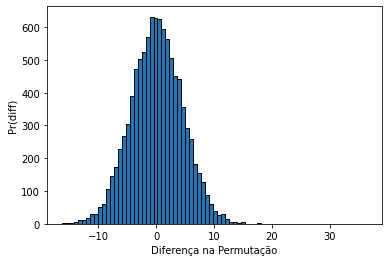

In [75]:
plt.hist(diferencas, bins=50, edgecolor='k')
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.vlines(t_obs, 0, 0.14, color='red')
plt.show()

Text(0.5, 1.0, 'Regressão linear simples')

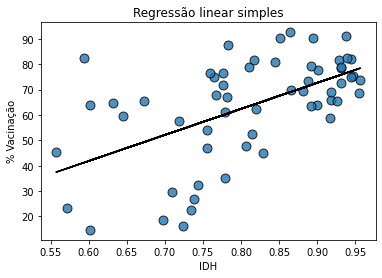

In [ ]:
### regressao linear


from sklearn.linear_model import LinearRegression

X = temp['2019'].values.reshape(-1, 1)   # put your dates in here
y = temp['people_fully_vaccinated_per_hundred'].values.reshape(-1, 1)   # put your kwh in here

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(X, model.predict(X),color='k')
plt.xlabel('IDH')
plt.ylabel('% Vacinação')
plt.title('Regressão linear simples')